# Final Project

### Data

In [516]:
# Import libraries
import pandas as pd
import numpy as np
import sys

import os
import matplotlib.pyplot as plt
import seaborn as sns

import json

# 1. Load global data from API

In [517]:
endpoint = 'https://api.covid19api.dev/'

body = {
"username":"testapi1",
"password":"coronavirus19"
}


import requests
s=requests.post(url=f"{endpoint}token", data=body).content

d = json.loads(s)
token = d['Document']

In [518]:



urls = {}
urls["url_confirmed"] = 'time_series_confirmed_global'
urls["url_recovered"] = 'time_series_recovered_global'
urls["url_deaths"] = 'time_series_deaths_global'


dfs = {}

for key, value in urls.items():

    headers={'Authorization': f'Bearer {token}'}
    r = requests.get(f"{endpoint}{value}", headers=headers)
    x = r.json()
    dfs[f"df_{key[4:]}"] = pd.DataFrame(x['Document'])
    
    
print(dfs.keys())



dict_keys(['df_confirmed', 'df_recovered', 'df_deaths'])


In [519]:
dfs['df_confirmed'].head()

,id,province_state,country_region,latitude,longitude,jan222020,jan232020,jan242020,jan252020,jan262020,...,apr232021,apr242021,apr252021,apr262021,apr272021,apr282021,apr292021,apr302021,may012021,may022021
0,0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,...,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122
1,1,0,Albania,41.15330,20.168300,0,0,0,0,0,...,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238
2,2,0,Algeria,28.03390,1.659600,0,0,0,0,0,...,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522
3,3,0,Andorra,42.50630,1.521800,0,0,0,0,0,...,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282
4,4,0,Angola,-11.20270,17.873900,0,0,0,0,0,...,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993


## Data transformation: Date from columns to rows. There will be two columns: Date and Confirmed, Death or Recovered

In [520]:
dfs_melted = {}
for key, value in dfs.items():
    dfs_melted[key] = value.melt(id_vars=['id', 'province_state', 'country_region', 'latitude', 'longitude'], var_name='Date',
                  value_name=f'{key[3:]}')

dfs_melted.keys()

dict_keys(['df_confirmed', 'df_recovered', 'df_deaths'])

In [521]:
for k, v in dfs_melted.items():
    print(f"Shape: {df.shape}")
    dfs_melted[k] = v.drop('id', 1)
    print(dfs_melted[k].head())


Shape: (128425, 6)
  province_state country_region  latitude  longitude       Date  confirmed
0              0    Afghanistan  33.93911  67.709953  jan222020          0
1              0        Albania  41.15330  20.168300  jan222020          0
2              0        Algeria  28.03390   1.659600  jan222020          0
3              0        Andorra  42.50630   1.521800  jan222020          0
4              0         Angola -11.20270  17.873900  jan222020          0
Shape: (128425, 6)
  province_state country_region  latitude  longitude       Date  recovered
0              0    Afghanistan  33.93911  67.709953  jan222020          0
1              0        Albania  41.15330  20.168300  jan222020          0
2              0        Algeria  28.03390   1.659600  jan222020          0
3              0        Andorra  42.50630   1.521800  jan222020          0
4              0         Angola -11.20270  17.873900  jan222020          0
Shape: (128425, 6)
  province_state country_region  latitude  

## Merge data and rename columns

In [522]:
dfs_melted['df_confirmed'].columns

Index(['province_state', 'country_region', 'latitude', 'longitude', 'Date',
       'confirmed'],
      dtype='object')

In [523]:
fixed_columns = ['province_state', 'country_region', 'latitude', 'longitude', 'Date']

print(dfs_melted['df_confirmed'].shape)
print(dfs_melted['df_recovered'].shape)
df_merged = pd.merge(dfs_melted['df_confirmed'], dfs_melted['df_recovered'], on=fixed_columns )
print(df_merged.shape)
df_merged = pd.merge(df_merged, dfs_melted['df_deaths'], on=fixed_columns )
print(df_merged.shape)

df_merged.head()

(128425, 6)
(121420, 6)
(118618, 7)
(118618, 8)


,province_state,country_region,latitude,longitude,Date,confirmed,recovered,deaths
0,0,Afghanistan,33.93911,67.709953,jan222020,0,0,0
1,0,Albania,41.15330,20.168300,jan222020,0,0,0
2,0,Algeria,28.03390,1.659600,jan222020,0,0,0
3,0,Andorra,42.50630,1.521800,jan222020,0,0,0
4,0,Angola,-11.20270,17.873900,jan222020,0,0,0


In [524]:
df_merged.tail()

,province_state,country_region,latitude,longitude,Date,confirmed,recovered,deaths
118613,0,Vietnam,14.058324,108.277199,may022021,2962,2549,35
118614,0,West Bank and Gaza,31.952200,35.233200,may022021,297638,275392,3272
118615,0,Yemen,15.552727,48.516388,may022021,6341,2875,1233
118616,0,Zambia,-13.133897,27.849332,may022021,91693,90082,1253
118617,0,Zimbabwe,-19.015438,29.154857,may022021,38281,35634,1570


In [525]:
df_merged.columns = ['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Recovered', 'Deaths']

df_merged['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

## Data cleaning

In [526]:
columns_to_delete = ['State', 'Lat', 'Long']

for c in columns_to_delete:
    try:
        df_merged = df_merged.drop(c, 1)
    except:
        pass
df_merged.head()

,Country,Date,Confirmed,Recovered,Deaths
0,Afghanistan,jan222020,0,0,0
1,Albania,jan222020,0,0,0
2,Algeria,jan222020,0,0,0
3,Andorra,jan222020,0,0,0
4,Angola,jan222020,0,0,0


In [527]:
df_merged = df_merged.groupby(['Country','Date'], as_index=False).sum()


In [528]:
df_concatenated = df_merged
df_concatenated.tail()

,Country,Date,Confirmed,Recovered,Deaths
87791,Zimbabwe,sep262020,7803,6067,227
87792,Zimbabwe,sep272020,7812,6106,227
87793,Zimbabwe,sep282020,7816,6112,228
87794,Zimbabwe,sep292020,7837,6122,228
87795,Zimbabwe,sep302020,7838,6303,228


## New Column "death_over_confirmed":  Percentage of deaths over confirmed cases

In [529]:
def f(row):
    try:
        return row['Deaths']/row['Confirmed']*100
    except:
        return 0

df_concatenated['death_over_confirmed'] = df_concatenated.apply(f, axis=1)

In [530]:
df_concatenated.tail()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
87791,Zimbabwe,sep262020,7803,6067,227,2.909138
87792,Zimbabwe,sep272020,7812,6106,227,2.905786
87793,Zimbabwe,sep282020,7816,6112,228,2.917093
87794,Zimbabwe,sep292020,7837,6122,228,2.909277
87795,Zimbabwe,sep302020,7838,6303,228,2.908905


## Some tests to analyze the data

In [531]:
df_concatenated.sort_values(['Date', 'Country', 'death_over_confirmed']).tail()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
85927,Vietnam,sep302020,1094,1010,35,3.199269
86394,West Bank and Gaza,sep302020,39899,31743,311,0.779468
86861,Yemen,sep302020,2034,1286,587,28.859390
87328,Zambia,sep302020,14759,13959,332,2.249475
87795,Zimbabwe,sep302020,7838,6303,228,2.908905


In [532]:
df_concatenated['Date'].max()

'sep302020'

## Convert column Date to datetime type

In [533]:
df_concatenated['Date'] =  pd.to_datetime(df_concatenated['Date'], format='%b%d%Y')


In [534]:
## Group by country annd Date
df_concatenated.groupby(['Country','Date'], as_index=False).sum()


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
0,Afghanistan,2020-01-22,0,0,0,0.000000
1,Afghanistan,2020-01-23,0,0,0,0.000000
2,Afghanistan,2020-01-24,0,0,0,0.000000
3,Afghanistan,2020-01-25,0,0,0,0.000000
4,Afghanistan,2020-01-26,0,0,0,0.000000
...,...,...,...,...,...,...
87791,Zimbabwe,2021-04-28,38191,35517,1565,4.097824
87792,Zimbabwe,2021-04-29,38235,35594,1567,4.098339
87793,Zimbabwe,2021-04-30,38257,35612,1567,4.095982
87794,Zimbabwe,2021-05-01,38260,35620,1568,4.098275


In [535]:
df_concatenated['Date'].max()


Timestamp('2021-05-02 00:00:00')

## More analytics to better understand the data

In [536]:
df_concatenated.sort_values(['Date', 'death_over_confirmed', 'Country']).tail()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
76000,Sudan,2021-05-02,33944,26795,2349,6.920222
53117,Mexico,2021-05-02,2348873,1869529,217233,9.248393
86741,Yemen,2021-05-02,6341,2875,1233,19.444883
48447,MS Zaandam,2021-05-02,9,7,2,22.222222
84873,Vanuatu,2021-05-02,4,3,1,25.000000


In [537]:
df_concatenated[df_concatenated['Country']=='Vanuatu']

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
84527,Vanuatu,2020-04-01,0,0,0,0.0
84528,Vanuatu,2021-04-01,3,1,0,0.0
84529,Vanuatu,2020-04-02,0,0,0,0.0
84530,Vanuatu,2021-04-02,3,1,0,0.0
84531,Vanuatu,2020-04-03,0,0,0,0.0
...,...,...,...,...,...,...
84989,Vanuatu,2020-09-26,0,0,0,0.0
84990,Vanuatu,2020-09-27,0,0,0,0.0
84991,Vanuatu,2020-09-28,0,0,0,0.0
84992,Vanuatu,2020-09-29,0,0,0,0.0


## Top countries in Deaths and Confirmed

In [538]:
max_date = df_concatenated['Date'].max()
max_date

Timestamp('2021-05-02 00:00:00')

In [539]:
idxs = df_concatenated['Date'] == max_date
df_concatenated[idxs].sort_values(['Deaths', 'death_over_confirmed', 'Country'], ascending=[False, False, True]).head(10)

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
81604,US,2021-05-02,32421641,0,577045,1.779814
11087,Brazil,2021-05-02,14754910,13083550,407639,2.762735
36772,India,2021-05-02,19925517,16292725,218959,1.098887
53117,Mexico,2021-05-02,2348873,1869529,217233,9.248393
83472,United Kingdom,2021-05-02,4435831,14684,127796,2.880993
39574,Italy,2021-05-02,4044762,3492679,121177,2.995899
65726,Russia,2021-05-02,4768476,4393260,109011,2.286076
28833,France,2021-05-02,5713393,362043,104980,1.837437
30701,Germany,2021-05-02,3432676,3051730,83292,2.426445
75066,Spain,2021-05-02,3524077,150376,78216,2.219475


## Linear chart of top 10 Countries

In [540]:
top_countries = df_concatenated[idxs].sort_values(['Deaths', 'death_over_confirmed', 'Country'], ascending=[False, False, True]).head(5)['Country'].tolist()
top_countries

['US', 'Brazil', 'India', 'Mexico', 'United Kingdom']

In [541]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [542]:
idxs = df_concatenated['Country'].isin(top_countries)
df_top_countries = df_concatenated[idxs]
df_top_countries


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
10741,Brazil,2020-04-01,6836,127,240,3.510825
10742,Brazil,2021-04-01,12839844,11240213,325284,2.533395
10743,Brazil,2020-04-02,8044,127,324,4.027847
10744,Brazil,2021-04-02,12910082,11277632,328206,2.542246
10745,Brazil,2020-04-03,9056,127,359,3.964223
...,...,...,...,...,...,...
83588,United Kingdom,2020-09-26,431819,2335,42060,9.740192
83589,United Kingdom,2020-09-27,437519,2341,42077,9.617182
83590,United Kingdom,2020-09-28,441575,2354,42090,9.531790
83591,United Kingdom,2020-09-29,448731,2370,42162,9.395830


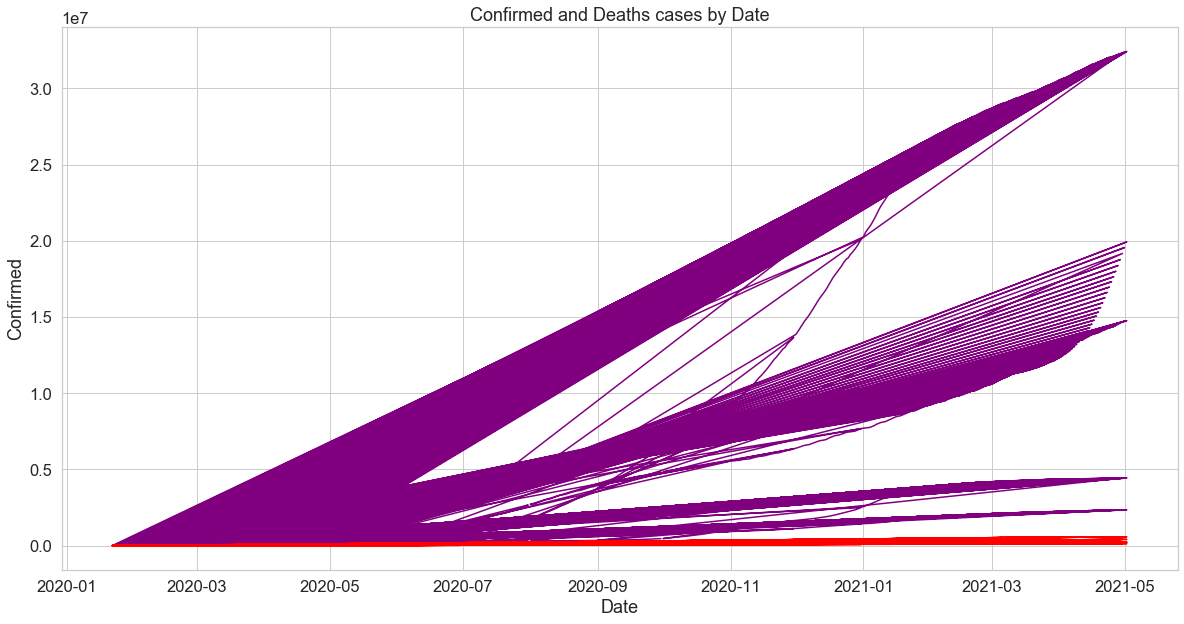

In [543]:

# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_top_countries['Date'],
        df_top_countries['Confirmed'],
        color='purple')

# Add x-axis and y-axis
ax.plot(df_top_countries['Date'],
        df_top_countries['Deaths'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Confirmed",
       title="Confirmed and Deaths cases by Date")

plt.show()

Brazil
India
Mexico
US
United Kingdom


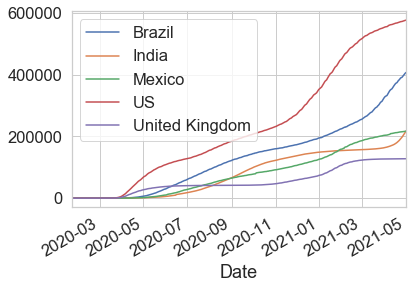

In [544]:


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='Deaths', ax=ax,label=n)

Brazil
France
India
Turkey
US


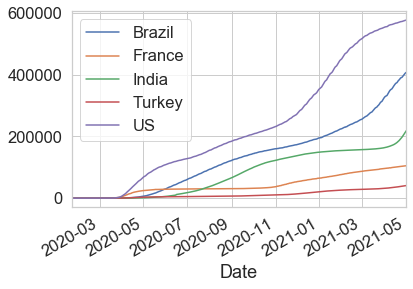

In [545]:
idxs = df_concatenated['Date'] == max_date

top_countries = df_concatenated[idxs].sort_values(['Confirmed', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

idxs = df_concatenated['Country'].isin(top_countries)

df_top_countries = df_concatenated[idxs]


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='Deaths', ax=ax,label=n)

## Top 10 Countries death_over_confirmed


In [546]:
idxs = df_concatenated['Date'] == max_date

top_countries = df_concatenated[idxs].sort_values(['death_over_confirmed', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

print(top_countries)
idxs = (df_concatenated['Country'].isin(top_countries)) & (df_concatenated['Date'] == max_date)

df_top_countries = df_concatenated[idxs]

df_top_countries


['Vanuatu', 'MS Zaandam', 'Yemen', 'Mexico', 'Sudan']


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
48447,MS Zaandam,2021-05-02,9,7,2,22.222222
53117,Mexico,2021-05-02,2348873,1869529,217233,9.248393
76000,Sudan,2021-05-02,33944,26795,2349,6.920222
84873,Vanuatu,2021-05-02,4,3,1,25.000000
86741,Yemen,2021-05-02,6341,2875,1233,19.444883


In [547]:
idxs = (df_concatenated['Date'] == max_date) & (df_concatenated['Confirmed'] > 10000)

top_countries = df_concatenated[idxs].sort_values(['death_over_confirmed', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

print(top_countries)
idxs = (df_concatenated['Country'].isin(top_countries)) & (df_concatenated['Date'] == max_date) & (df_concatenated['Confirmed'] > 10000)

df_top_countries = df_concatenated[idxs]

df_top_countries.sort_values(['death_over_confirmed', 'Country'], ascending=[False, True])


['Mexico', 'Sudan', 'Egypt', 'Somalia', 'Ecuador']


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
53117,Mexico,2021-05-02,2348873,1869529,217233,9.248393
76000,Sudan,2021-05-02,33944,26795,2349,6.920222
24630,Egypt,2021-05-02,229635,172342,13469,5.865395
73665,Somalia,2021-05-02,13915,5847,713,5.123967
24163,Ecuador,2021-05-02,387299,329582,18740,4.838639


# Get Vaccination Data

In [548]:
df_vaccination = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
df_vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


## Data cleaning

In [549]:
columns_to_delete = ['iso_code', 'date', 'daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million']

try:
    df_vaccination['Date'] =  pd.to_datetime(df_vaccination['date'], infer_datetime_format=True)
except: 
    pass


for c in columns_to_delete:
    try:
        df_vaccination = df_vaccination.drop(c, 1)
    except:
        pass


df_vaccination.columns = ['Country']  + df_vaccination.columns.tolist()[1:]

df_merged.groupby(['Country','Date'], as_index=False).sum()

df_vaccination.head()

,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
0,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,2021-02-22
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-23
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-24
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-25
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-26


## Delete non countries

In [550]:
idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries

['World', 'Asia', 'North America', 'China', 'United States', 'Europe', 'India', 'European Union', 'South America', 'Brazil', 'Germany', 'Turkey', 'Italy', 'Indonesia', 'Russia', 'Mexico', 'Africa', 'Canada', 'United Arab Emirates', 'Israel']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
173,Africa,1.795730e+07,12874229.0,4896743.0,1.34,0.96,0.37,2021-05-02
888,Asia,5.507761e+08,199531797.0,64466273.0,11.87,4.30,1.39,2021-05-02
2282,Brazil,4.317336e+07,29421191.0,13752165.0,20.31,13.84,6.47,2021-05-02
2654,Canada,1.382548e+07,12696698.0,1128778.0,36.63,33.64,2.99,2021-05-02
3055,China,2.753380e+08,NaN,NaN,19.13,NaN,NaN,2021-05-02
4715,Europe,2.304349e+08,163238581.0,66559916.0,30.78,21.80,8.89,2021-05-02
4842,European Union,1.502552e+08,109537497.0,40519806.0,33.77,24.62,9.11,2021-05-02
5534,Germany,3.014792e+07,23492053.0,6655866.0,35.98,28.04,7.94,2021-05-02
6731,India,1.542115e+08,126704151.0,27507360.0,11.17,9.18,1.99,2021-05-02
6842,Indonesia,2.017252e+07,12469406.0,7703110.0,7.38,4.56,2.82,2021-05-02


## Delete non-country data

In [551]:
non_countries = ['World', 'Asia', 'North America', 'Europe', 'European Union', 'South America', 'Africa']

df_vaccination = df_vaccination[~df_vaccination['Country'].isin(non_countries)]


In [552]:
# rename United States to USA

df_vaccination.loc[df_vaccination['Country'].isin(['United States']), 'Country'] = 'US'


## Top total vaccinations

In [553]:
idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['total_vaccinations'], ascending=False)

['China', 'US', 'India', 'Brazil', 'Germany', 'Turkey', 'Italy', 'Indonesia', 'Russia', 'Mexico', 'Canada', 'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Argentina', 'Hungary', 'Belgium', 'South Korea', 'Portugal', 'Czechia']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
3055,China,275338000.0,NaN,NaN,19.13,NaN,NaN,2021-05-02
15447,US,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6731,India,154211511.0,126704151.0,27507360.0,11.17,9.18,1.99,2021-05-02
2282,Brazil,43173356.0,29421191.0,13752165.0,20.31,13.84,6.47,2021-05-02
5534,Germany,30147919.0,23492053.0,6655866.0,35.98,28.04,7.94,2021-05-02
14862,Turkey,23006734.0,13800405.0,9206329.0,27.28,16.36,10.92,2021-05-02
7463,Italy,20755863.0,14593168.0,6249347.0,34.33,24.14,10.34,2021-05-02
6842,Indonesia,20172516.0,12469406.0,7703110.0,7.38,4.56,2.82,2021-05-02
12241,Russia,20070743.0,12431003.0,7639740.0,13.75,8.52,5.24,2021-05-02
9386,Mexico,18326726.0,12572997.0,7650150.0,14.21,9.75,5.93,2021-05-02


## Top people fully vaccinations

In [554]:

idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['people_fully_vaccinated', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['people_fully_vaccinated'], ascending=False)

['US', 'India', 'Brazil', 'Turkey', 'Indonesia', 'Mexico', 'Russia', 'Germany', 'Italy', 'Israel', 'Hungary', 'Canada', 'Czechia', 'Cambodia', 'Argentina', 'Portugal', 'Austria', 'Belgium', 'Uruguay', 'Qatar']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
15447,US,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6731,India,154211511.0,126704151.0,27507360.0,11.17,9.18,1.99,2021-05-02
2282,Brazil,43173356.0,29421191.0,13752165.0,20.31,13.84,6.47,2021-05-02
14862,Turkey,23006734.0,13800405.0,9206329.0,27.28,16.36,10.92,2021-05-02
6842,Indonesia,20172516.0,12469406.0,7703110.0,7.38,4.56,2.82,2021-05-02
9386,Mexico,18326726.0,12572997.0,7650150.0,14.21,9.75,5.93,2021-05-02
12241,Russia,20070743.0,12431003.0,7639740.0,13.75,8.52,5.24,2021-05-02
5534,Germany,30147919.0,23492053.0,6655866.0,35.98,28.04,7.94,2021-05-02
7463,Italy,20755863.0,14593168.0,6249347.0,34.33,24.14,10.34,2021-05-02
7336,Israel,10458345.0,5403739.0,5054606.0,120.83,62.43,58.40,2021-05-02


## TOP total vaccinations per hundred

In [555]:

idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations_per_hundred', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['total_vaccinations_per_hundred'], ascending=False)

['Israel', 'United Arab Emirates', 'Bahrain', 'US', 'Hungary', 'Curacao', 'Qatar', 'Uruguay', 'Mongolia', 'Canada', 'Lithuania', 'Germany', 'Austria', 'Estonia', 'Italy', 'Belgium', 'Finland', 'Portugal', 'Slovenia', 'Czechia']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
7336,Israel,10458345.0,5403739.0,5054606.0,120.83,62.43,58.40,2021-05-02
15194,United Arab Emirates,10634693.0,NaN,NaN,107.53,NaN,NaN,2021-05-02
1375,Bahrain,1264087.0,717024.0,547063.0,74.29,42.14,32.15,2021-05-02
15447,US,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6501,Hungary,6150309.0,4073149.0,2077160.0,63.67,42.16,21.50,2021-05-02
3476,Curacao,97504.0,72861.0,24643.0,59.42,44.40,15.02,2021-05-02
11976,Qatar,1603913.0,1017019.0,586894.0,55.67,35.30,20.37,2021-05-02
15512,Uruguay,1834409.0,1165904.0,668505.0,52.81,33.56,19.24,2021-05-02
9627,Mongolia,1398592.0,947529.0,451063.0,42.66,28.90,13.76,2021-05-02
2654,Canada,13825476.0,12696698.0,1128778.0,36.63,33.64,2.99,2021-05-02


## TOP people fully vaccinated per hundred

In [556]:


idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['people_fully_vaccinated_per_hundred', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['people_fully_vaccinated_per_hundred'], ascending=False)

['Israel', 'Bahrain', 'US', 'Hungary', 'Qatar', 'Uruguay', 'Curacao', 'Mongolia', 'Lithuania', 'Turkey', 'Italy', 'Slovenia', 'Austria', 'Czechia', 'Estonia', 'Slovakia', 'Portugal', 'Germany', 'Belgium', 'Hong Kong']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
7336,Israel,10458345.0,5403739.0,5054606.0,120.83,62.43,58.40,2021-05-02
1375,Bahrain,1264087.0,717024.0,547063.0,74.29,42.14,32.15,2021-05-02
15447,US,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6501,Hungary,6150309.0,4073149.0,2077160.0,63.67,42.16,21.50,2021-05-02
11976,Qatar,1603913.0,1017019.0,586894.0,55.67,35.30,20.37,2021-05-02
15512,Uruguay,1834409.0,1165904.0,668505.0,52.81,33.56,19.24,2021-05-02
3476,Curacao,97504.0,72861.0,24643.0,59.42,44.40,15.02,2021-05-02
9627,Mongolia,1398592.0,947529.0,451063.0,42.66,28.90,13.76,2021-05-02
8634,Lithuania,995557.0,691403.0,304154.0,36.57,25.40,11.17,2021-05-02
14862,Turkey,23006734.0,13800405.0,9206329.0,27.28,16.36,10.92,2021-05-02


## Total vaccinations evolution in 5 Top Countries

Brazil
China
Germany
India
US


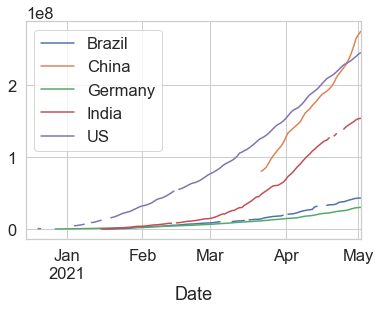

In [557]:
idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

idxs = df_vaccination['Country'].isin(top_countries)

df_top_countries = df_vaccination[idxs]


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='total_vaccinations', ax=ax,label=n)

## I will use Confirmed from df_concatenated and total_vaccinations from df_vaccinations to analyze

In [558]:
fixed_columns = ['Country', 'Date']

df_to_analize = pd.merge(df_concatenated[fixed_columns +['Confirmed']], df_vaccination[fixed_columns + ['total_vaccinations']], on=fixed_columns )

print(df_to_analize.shape)

df_to_analize.head()

 

(12576, 4)


,Country,Date,Confirmed,total_vaccinations
0,Afghanistan,2021-04-01,56517,NaN
1,Afghanistan,2021-04-02,56572,NaN
2,Afghanistan,2021-04-03,56595,NaN
3,Afghanistan,2021-04-04,56676,NaN
4,Afghanistan,2021-04-05,56717,NaN


In [559]:
df_to_analize = df_to_analize.fillna(0)
df_to_analize.head(10)


,Country,Date,Confirmed,total_vaccinations
0,Afghanistan,2021-04-01,56517,0.0
1,Afghanistan,2021-04-02,56572,0.0
2,Afghanistan,2021-04-03,56595,0.0
3,Afghanistan,2021-04-04,56676,0.0
4,Afghanistan,2021-04-05,56717,0.0
5,Afghanistan,2021-04-06,56779,0.0
6,Afghanistan,2021-04-07,56873,120000.0
7,Afghanistan,2021-04-08,56943,0.0
8,Afghanistan,2021-04-09,57019,0.0
9,Afghanistan,2021-04-10,57144,0.0


Brazil
China
Germany
India
US


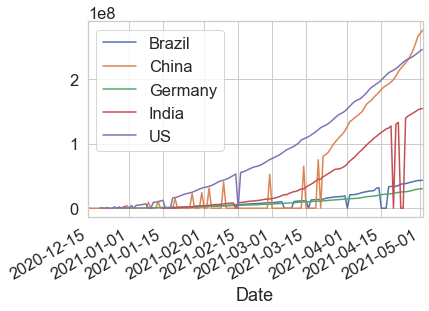

In [560]:
idxs = df_to_analize['Date'] == max_date

top_countries = df_to_analize[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

idxs = df_to_analize['Country'].isin(top_countries)

df_top_countries = df_to_analize[idxs]


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='total_vaccinations', ax=ax,label=n)

# I'm going to analyze how the Confirmed evolved in the countries with the most vaccination total_vaccinations_per_hundred

## Selecting Countries

In [561]:
idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations_per_hundred', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

top_countries

['Israel', 'United Arab Emirates', 'Bahrain', 'US', 'Hungary']

## Filter data by Date since vaccination started

In [562]:
min_date = df_vaccination['Date'].min()
print(f"Min Date: {min_date}")


Min Date: 2020-12-14 00:00:00


## Filter both dataFrames

In [563]:
idxs = (df_vaccination['Date'] >= min_date) & (df_vaccination['Country'].isin(top_countries) )

df_vaccination_filtered = df_vaccination[idxs]

df_vaccination_filtered.astype({'total_vaccinations_per_hundred':'float'})


df_vaccination_filtered.shape

(644, 8)

In [564]:
df_concatenated.head()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
0,Afghanistan,2020-04-01,197,5,4,2.030457
1,Afghanistan,2021-04-01,56517,51788,2489,4.403985
2,Afghanistan,2020-04-02,240,10,4,1.666667
3,Afghanistan,2021-04-02,56572,51798,2495,4.410309
4,Afghanistan,2020-04-03,275,10,8,2.909091


In [565]:

print(top_countries)
idxs = (df_concatenated['Date'] >= min_date) & (df_concatenated['Country'].isin(top_countries) )

df_confirmed_filtered = df_concatenated[idxs]

df_confirmed_filtered.astype({'Confirmed':'float'})

df_confirmed_filtered = df_confirmed_filtered[['Country', 'Date', 'Confirmed']]
df_confirmed_filtered.shape

['Israel', 'United Arab Emirates', 'Bahrain', 'US', 'Hungary']


(700, 3)

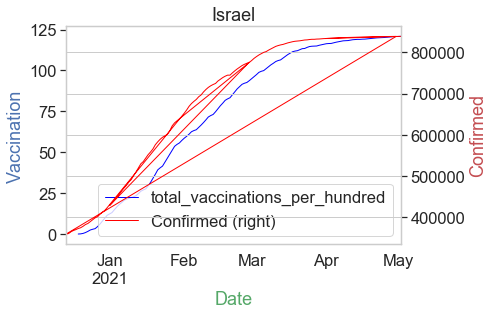

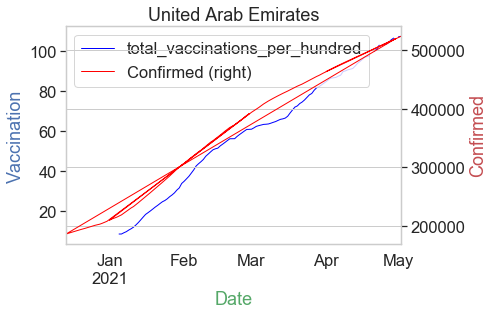

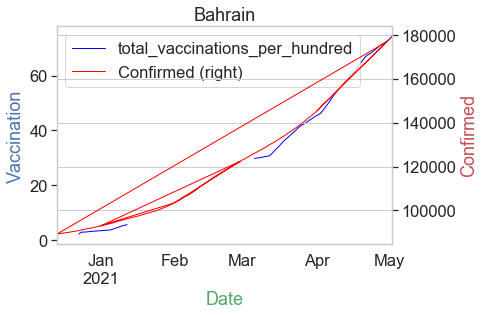

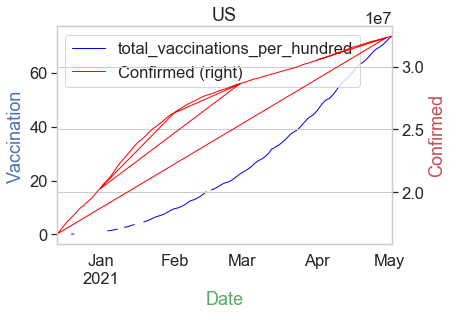

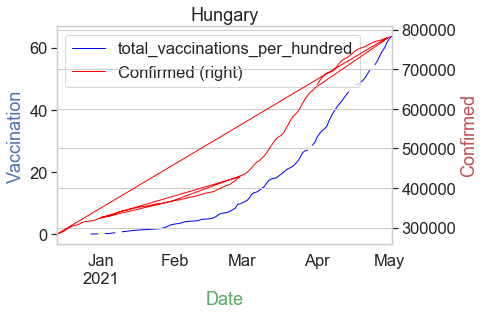

In [566]:

for c in top_countries:
    

    # creating axes object and defining plot
    ax = df_vaccination_filtered[df_vaccination_filtered['Country']==c].plot(kind = 'line', x = 'Date',
                    y = 'total_vaccinations_per_hundred', color = 'Blue',
                    linewidth = 1)
    
    
    ax2 = df_confirmed_filtered[df_confirmed_filtered['Country']==c].plot(kind = 'line', x = 'Date', 
                    y = 'Confirmed', secondary_y = True,
                    color = 'Red',  linewidth = 1,
                    ax = ax)
    
    #title of the plot
    plt.title(c)
    
    #labeling x and y-axis
    ax.set_xlabel('Date', color = 'g')
    ax.set_ylabel('Vaccination', color = "b")
    ax2.set_ylabel('Confirmed', color = 'r')
    
    #defining display layout 
    #plt.tight_layout()
    
    #show plot
    plt.show()





# Conclusion

Based on data exploration, comparisons and graphs we can see that as vaccination per hundreds increases, the contagion curve begins to flatten. This could be a sign that vaccination is being effective in controlling the pandemic.